In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from oetils.plotting import init_plotting

In [2]:
W = init_plotting(latex=True)

In [3]:
data = pd.DataFrame({
    'h': [.8, 2., 4., 6., 8., 10., 12.],
    'T': [265, 274, 298, 313, 330, 348, 371]
})
data

h    T
0   0.8  265
1   2.0  274
2   4.0  298
3   6.0  313
4   8.0  330
5  10.0  348
6  12.0  371

In [4]:
# Least squares fit
X = np.concatenate([np.ones((len(data), 1)), data.h.values[:, None]], -1)
w = np.linalg.solve(X.T @ X, X.T @ data['T'])

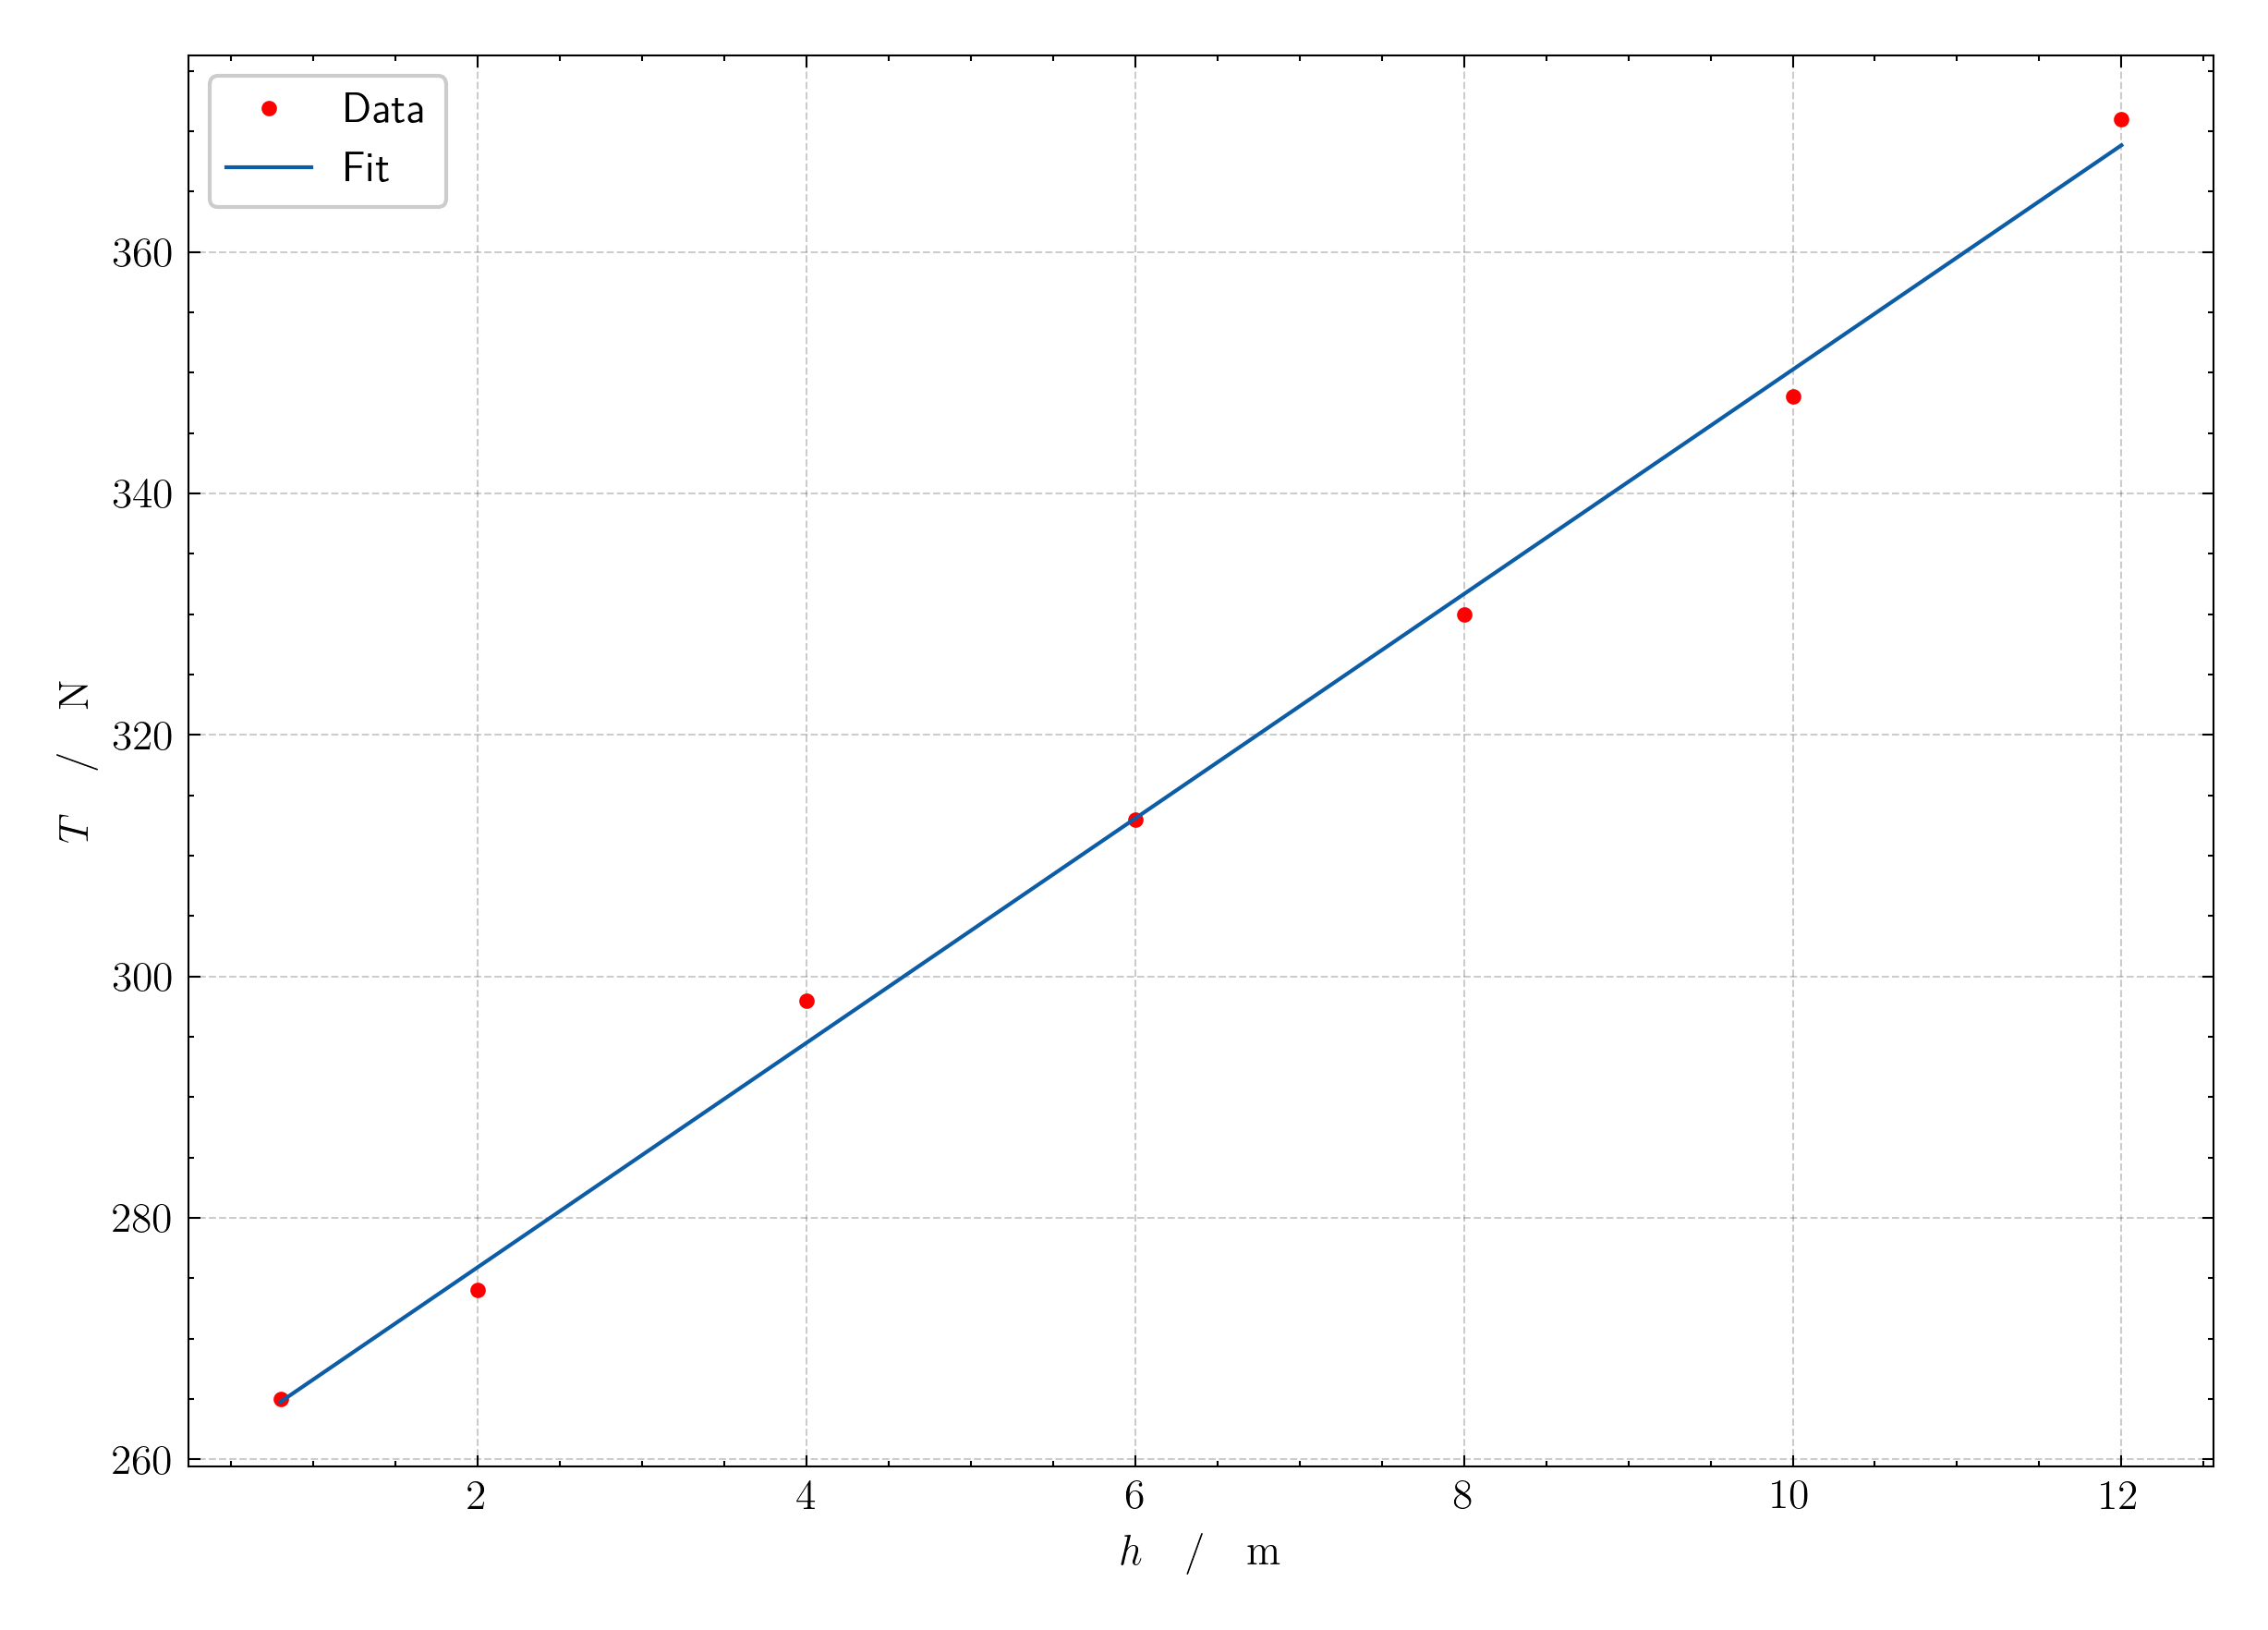

In [5]:
fig, ax = plt.subplots()
ax.set_xlabel(r"$h\quad/\quad\mathrm{m}$")
ax.set_ylabel(r"$T\quad/\quad\mathrm{N}$")
ax.plot(data.h, data['T'], 'r.', label="Data")
x = np.linspace(data.h.min(), data.h.max())
ax.plot(x, sum(w[i] * x**i for i in range(2)), label="Fit")
ax.legend()

In [6]:
g = 9.81
m = data['T'][0] / g
L1 = 2 * m * g / w[1]
L2 = 2 * data.h[0] / (1 - w[0]/(m * g))
L = (L1 + L2) / 2
print(f"Estimated length: {L:.1f}±{abs(L1 - L2)/2:.1f} m")

Estimated length: 56.1±0.9 m


In [7]:
h_max = (411 - w[0]) / w[1]
print(f"Maximum drop height: {h_max:.1f} m")

Maximum drop height: 16.5 m
